In [1]:
# Importing Libraries 
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
#Import dataset 
dataset = pd.read_excel('C:/Users/Lenovo/Desktop/rajan/Project/SA/Dataset.xlsx')  

In [3]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. . .The filming...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive
...,...,...
9995,It SURPRISINGLY had a plot! ;) I've seen movie...,negative
9996,I suppose I'm supposed to take something like ...,negative
9997,This is strictly for Pryor fans. Just because ...,negative
9998,The only saving grace of this movie is that it...,negative


In [4]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
 
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array 
# to append clean text  
corpus = []  
  
# 10000 (reviews) rows to clean 
for i in range(0, 10000):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
corpus

['one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side',
 'won

In [6]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 
  
# To extract max 15000 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 15000)  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray()  
  

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer  
tf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

Xtf = tf.fit_transform(X).toarray()

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer  
tf = TfidfTransformer(norm='l2', use_idf=False, smooth_idf=True, sublinear_tf=False)

Xft = tf.fit_transform(X).toarray()

In [9]:
# y contains answers if review 
# is positive or negative 
y = dataset['sentiment'].values  

In [10]:
#Converting label to 1 or 0
sentiment = {'positive': 1,'negative': 0} 

y = [sentiment[item] for item in y]

In [11]:
#Exporting the frequency termed corpus to file
import pickle

pickle_out = open("X_rr_freq.pickle","wb")
pickle.dump(Xft, pickle_out)
pickle_out.close()

In [12]:
#Exporting the countvectorized corpus to file
import pickle

pickle_out = open("X_rr_cv.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_rr_cv.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
#Exporting the tf-idf corpus to file

import pickle

pickle_out = open("X_rr_tf.pickle","wb")
pickle.dump(Xtf, pickle_out)
pickle_out.close()

In [14]:
#Importing the countvectorized corpus to file

import pickle

pickle_in = open("X_rr_cv.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
y = pickle.load(pickle_in)

In [15]:
#Importing the tf-idf corpus to file

import pickle

pickle_in = open("X_rr_tf.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
y = pickle.load(pickle_in)

In [16]:

def topwords(corpus, n):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [17]:
top_words= topwords(corpus,100)

In [18]:
!pip install wordcloud

In [19]:
 # importing all necessery modules 
from wordcloud import WordCloud

In [20]:
tt=str(top_words)
tt=re.sub('[^a-zA-Z]', ' ', tt)

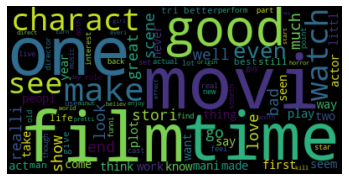

In [21]:
wordcloud = WordCloud().generate(tt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
#Term Frequency

In [23]:
def print_score(cv_score):
    
    accuracy_cv=cv_score['test_accuracy'].mean() * 100
    precision_cv=cv_score['test_precision'].mean() * 100
    recall_cv=cv_score['test_recall'].mean() * 100
    f1_cv=cv_score['test_f1'].mean() * 100
    
    return (accuracy_cv,precision_cv,recall_cv,f1_cv)

In [24]:
pickle_in = open("X_rr_freq.pickle","rb")
Xf = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
yf = pickle.load(pickle_in)

In [25]:
np.shape(Xf) 

(10000, 15000)

In [26]:
np.shape(yf) 

(10000,)

In [27]:
# Splitting the dataset into 
# the Training set and Test set 
from sklearn.model_selection import train_test_split

In [28]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.20) 

In [29]:
# Fitting Random Forest Classification
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
modelf = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
modelf.fit(Xf_train, yf_train)  

# Predicting the Test set results 
yf_pred_rf =modelf.predict(Xf_test) 
  
yf_pred_rf 

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
  
cm_rff = confusion_matrix(yf_test, yf_pred_rf) 

from sklearn.metrics import accuracy_score
acf = accuracy_score(yf_test, yf_pred_rf)
acc_rff = acf * 100
acc_rff

86.05000000000001

In [30]:
# Fitting Multinomial Naive Bayes Classification
# to the Training set 
from sklearn.naive_bayes import MultinomialNB
classifierf = MultinomialNB(alpha=0.1)
classifierf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred = classifierf.predict(Xf_test)
  
cmf = confusion_matrix(yf_test, yf_pred) 
  
cmf

from sklearn.metrics import accuracy_score
acf = accuracy_score(yf_test, yf_pred)
acf * 100

85.65

In [31]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier_bnbf = BernoulliNB(alpha=0.8)
classifier_bnbf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_bnbf = classifier_bnbf.predict(Xf_test)

cm_bnbf = confusion_matrix(yf_test, yf_pred_bnbf)  
ac_bnbf = accuracy_score(yf_test, yf_pred_bnbf)
acc_bnbf = ac_bnbf * 100
acc_bnbf

85.39999999999999

In [32]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier_lrf = linear_model.LogisticRegression(C=1.5)
classifier_lrf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_lr = classifier_lrf.predict(Xf_test)
cm_lrf = confusion_matrix(yf_test, yf_pred_lr)  
ac_lrf = accuracy_score(yf_test, yf_pred_lr)
acc_lrf = ac_lrf * 100
acc_lrf

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


86.5

In [33]:
# Neural Network

# Fitting NN to the Training set
from sklearn.neural_network import MLPClassifier
classifier_nnf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
classifier_nnf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_nn = classifier_nnf.predict(Xf_test)
cm_nnf = confusion_matrix(yf_test, yf_pred_nn)  
ac_nnf = accuracy_score(yf_test, yf_pred_nn)
acc_nnf = ac_nnf * 100
acc_nnf

84.55

In [34]:
# Decision Tree
# Fitting DT to the Training set
from sklearn import tree
classifier_dtf = tree.DecisionTreeClassifier()
classifier_dtf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_dt = classifier_dtf.predict(Xf_test)
cm_dtf = confusion_matrix(yf_test, yf_pred_dt)  
ac_dtf = accuracy_score(yf_test, yf_pred_dt)
acc_dtf = ac_dtf * 100
acc_dtf

70.95

In [35]:
# SVM
# Fitting SVM to the Training set
from sklearn import svm
classifier_svmf = svm.SVC(C=1,gamma='scale',cache_size=2000,verbose=2)
classifier_svmf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_svm = classifier_svmf.predict(Xf_test)
cm_svmf = confusion_matrix(yf_test, yf_pred_svm)  
ac_svmf = accuracy_score(yf_test, yf_pred_svm)
acc_svmf = ac_svmf * 100
acc_svmf

[LibSVM]

86.45

In [36]:
# Necessary imports: 
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import metrics

In [37]:
# Perform 10-fold cross validation Random Forest
scoresrff = cross_validate(modelf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresrff)



(86.04999999999998, 85.32429422002063, 87.12, 86.19894865156948)

In [38]:
# Perform 10-fold cross validation Naive Bayes
scoresnbf = cross_validate(classifierf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresnbf)



(85.94000000000001, 86.46056792112581, 85.28, 85.85249179170049)

In [39]:
# Perform 10-fold cross validation Bernoulli Naive Bayes
scoresbnbf = cross_validate(classifier_bnbf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresbnbf)



(85.4, 86.10965609615263, 84.46000000000001, 85.2611231486724)

In [40]:
# Perform 10-fold cross validation Logistic Regression
scoreslrf = cross_validate(classifier_lrf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoreslrf)



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

(86.63000000000001, 85.73356321568055, 87.92, 86.79752553405882)

In [41]:
# Perform 10-fold cross validation Neural Network
scoresnnf = cross_validate(classifier_nnf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresnnf)



(85.33999999999999, 84.84051213248067, 86.06, 85.4421394232098)

In [42]:
# Perform 10-fold cross validation Decision Tree
scoresdtf = cross_validate(classifier_dtf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresdtf)



(70.73, 70.77435917685791, 70.67999999999999, 70.71165009258787)

In [43]:
# Perform 10-fold cross validation SVM
scoresf = cross_validate(classifier_svmf, Xf, yf, cv=2,scoring=['accuracy','precision','recall','f1'])
print_score(scoresf)



[LibSVM][LibSVM]

(85.84, 84.50227633172524, 87.77999999999999, 86.10924038260785)

In [44]:
#Count Vectorization

In [45]:
#Importing the countvectorized corpus to file

import pickle

pickle_in = open("X_rr_cv.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
y = pickle.load(pickle_in)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [47]:
# Fitting Random Forest Classification
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred_rf = model.predict(X_test) 
  
y_pred_rf 

  
cm_rf = confusion_matrix(y_test, y_pred_rf) 

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred_rf)
acc_rf = ac * 100
acc_rf

87.4

In [48]:
# Fitting Multinomial Naive Bayes Classification
# to the Training set 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
  
cm = confusion_matrix(y_test, y_pred) 
  
cm 

ac = accuracy_score(y_test, y_pred)
ac * 100

83.39999999999999

In [49]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier_bnb = BernoulliNB(alpha=0.8)
classifier_bnb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_bnb = classifier_bnb.predict(X_test)

cm_bnb = confusion_matrix(y_test, y_pred_bnb)  
ac_bnb = accuracy_score(y_test, y_pred_bnb)
acc_bnb = ac_bnb * 100
acc_bnb

85.3

In [50]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier_lr = linear_model.LogisticRegression(C=1.5)
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)  
ac_lr = accuracy_score(y_test, y_pred_lr)
acc_lr = ac_lr * 100
acc_lr

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


86.4

In [51]:
# Neural Network

# Fitting NN to the Training set
from sklearn.neural_network import MLPClassifier
classifier_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
classifier_nn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nn = classifier_nn.predict(X_test)
cm_nn = confusion_matrix(y_test, y_pred_nn)  
ac_nn = accuracy_score(y_test, y_pred_nn)
acc_nn = ac_nn * 100
acc_nn

85.05

In [52]:
# Decision Tree
# Fitting DT to the Training set
from sklearn import tree
classifier_dt = tree.DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)  
ac_dt = accuracy_score(y_test, y_pred_dt)
acc_dt = ac_dt * 100
acc_dt

72.75

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
# SVM
# Fitting SVM to the Training set
from sklearn import svm
classifier_svm = Pipeline([('scaler', StandardScaler()),
                  ('svm', svm.SVC(C=1000,gamma=0.001,cache_size=500,verbose=2,))])
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)  
ac_svm = accuracy_score(y_test, y_pred_svm)
acc_svm = ac_svm * 100
acc_svm

classifier_svm.fit(X_train, y_train)

[LibSVM][LibSVM]

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=1000, cache_size=500, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=2))],
         verbose=False)

In [55]:
# Perform 10-fold cross validation Random Forest
scoresrf = cross_validate(model, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresrf)

(86.05000000000001, 85.33134031872287, 87.08, 86.18651022666235)

In [56]:
# Perform 10-fold cross validation Naive Bayes
scoresnb = cross_validate(classifier, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresnb)

(84.07, 85.34874025219767, 82.29999999999998, 83.78460559463257)

In [57]:
# Perform 10-fold cross validation Bernoulli Naive Bayes
scoresbnb = cross_validate(classifier_bnb, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresbnb)

(85.4, 86.10965609615263, 84.46000000000001, 85.2611231486724)

In [58]:
# Perform 10-fold cross validation Logistic Regression
scoreslr = cross_validate(classifier_lr, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoreslr)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

(85.75, 84.93693456926252, 86.94000000000001, 85.91856755858194)

In [59]:
# Perform 10-fold cross validation Neural Network
scoresnn = cross_validate(classifier_nn, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresnn)

(84.72999999999999, 84.31967383514906, 85.35999999999999, 84.82772923872047)

In [60]:
# Perform 10-fold cross validation Decision Tree
scoresdt = cross_validate(classifier_dt, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
print_score(scoresdt)

(70.8, 70.89427037713666, 70.66000000000001, 70.7545214860389)

In [61]:
# Perform 10-fold cross validation SVM
scores = cross_validate(classifier_svm, X, y, cv=6,scoring=['accuracy','precision','recall','f1'])
print_score(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

(60.64011935709536, 78.31912923192502, 37.183890342707834, 44.82805304191857)

In [62]:
#Term Frequency - Inverse Document Frequency

In [63]:
#Importing the tfidf corpus to file

import pickle

pickle_in = open("X_rr_tf.pickle","rb")
Xtf = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
ytf = pickle.load(pickle_in)

In [64]:
Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(Xtf, ytf, test_size = 0.20) 

In [65]:
# Fitting Random Forest Classification
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
modeltf = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
modeltf.fit(Xtf_train, ytf_train)  

# Predicting the Test set results 
ytf_pred_rtf =modeltf.predict(Xtf_test) 
  
ytf_pred_rtf 

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
  
cm_rtf = confusion_matrix(ytf_test, ytf_pred_rtf) 

from sklearn.metrics import accuracy_score
actf = accuracy_score(ytf_test, ytf_pred_rtf)
acc_rtf = actf * 100
acc_rtf

85.75

In [66]:
# Fitting Multinomial Naive Bayes Classification
# to the Training set 
from sklearn.naive_bayes import MultinomialNB
classifiertf = MultinomialNB(alpha=0.1)
classifiertf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred = classifiertf.predict(Xtf_test)
  
cmtf = confusion_matrix(ytf_test, ytf_pred) 
  
cmtf 

from sklearn.metrics import accuracy_score
actf = accuracy_score(ytf_test, ytf_pred)
actf * 100

84.85000000000001

In [67]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier_bnbtf = BernoulliNB(alpha=0.8)
classifier_bnbtf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_bnb = classifier_bnbtf.predict(Xtf_test)

cm_bnbtf = confusion_matrix(ytf_test, ytf_pred_bnb)  
ac_bnbtf = accuracy_score(ytf_test, ytf_pred_bnb)
acc_bnbtf = ac_bnbtf * 100
acc_bnbtf

85.9

In [68]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier_lrtf = linear_model.LogisticRegression(C=1.5)
classifier_lrtf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_lr = classifier_lrtf.predict(Xtf_test)
cm_lrtf = confusion_matrix(ytf_test, ytf_pred_lr)  
ac_lrtf = accuracy_score(ytf_test, ytf_pred_lr)
acc_lrtf = ac_lrtf * 100
acc_lrtf

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


87.64999999999999

In [69]:
# Neural Network

# Fitting NN to the Training set
from sklearn.neural_network import MLPClassifier
classifier_nntf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
classifier_nntf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_nntf = classifier_nntf.predict(Xtf_test)
cm_nntf = confusion_matrix(ytf_test, ytf_pred_nntf)  
ac_nntf = accuracy_score(ytf_test, ytf_pred_nntf)
acc_nntf = ac_nntf * 100
acc_nntf

85.7

In [70]:
# Decision Tree
# Fitting DT to the Training set
from sklearn import tree
classifier_dttf = tree.DecisionTreeClassifier()
classifier_dttf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_dttf = classifier_dttf.predict(Xtf_test)
cm_dttf = confusion_matrix(ytf_test, ytf_pred_dttf)  
ac_dttf = accuracy_score(ytf_test, ytf_pred_dttf)
acc_dttf = ac_dttf * 100
acc_dttf

69.69999999999999

In [71]:
# SVM
# Fitting SVM to the Training set
from sklearn import svm
classifier_svmtf = Pipeline([('scaler', StandardScaler()),
                  ('svm', svm.SVC(cache_size=500,verbose=2,kernel='linear'))])
classifier_svmtf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_svmtf = classifier_svmtf.predict(Xtf_test)
cm_svmtf = confusion_matrix(ytf_test, ytf_pred_svmtf)  
ac_svmtf = accuracy_score(ytf_test, ytf_pred_svmtf)
acc_svmtf = ac_svmtf * 100
acc_svmtf

[LibSVM]

80.35

In [72]:
# Pertform 10-tfold cross validation Random Forest
scoresrtftf = cross_validate(modeltf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracyrtftf = print_score(scoresrtftf)
accuracyrtftf

(85.52, 84.79601082489768, 86.57999999999998, 85.66760816627787)

In [73]:
# Pertform 10-tfold cross validation Naive Bayes
scoresnbtf = cross_validate(classifiertf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracynbtf = print_score(scoresnbtf)
accuracynbtf

(84.44, 84.80877712323134, 83.93999999999998, 84.36439654575467)

In [74]:
# Pertform 10-tfold cross validation Bernoulli Naive Bayes
scoresbnbtf = cross_validate(classifier_bnbtf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracybnbtf = print_score(scoresbnbtf)
accuracybnbtf 

(85.4, 86.10965609615263, 84.46000000000001, 85.2611231486724)

In [75]:
# Pertform 10-tfold cross validation Logistic Regression
scoreslrtf = cross_validate(classifier_lrtf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracylrtf = print_score(scoreslrtf)
accuracylrtf

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

(87.93, 86.49718631796217, 89.94, 88.16825899077581)

In [76]:
# Pertform 10-tfold cross validation Neural Network
scoresnntf = cross_validate(classifier_nntf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracynntf = print_score(scoresnntf)
accuracynntf

(84.64, 84.19322682616277, 85.46000000000001, 84.76773560714767)

In [77]:
# Pertform 10-tfold cross validation Decision Tree
scoresdttf = cross_validate(classifier_dttf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracydttf = print_score(scoresdttf)
accuracydttf

(71.05, 71.25120942143312, 70.57999999999998, 70.90273183516723)

In [78]:
# Pertform 10-tfold cross validation SVM
scorestf = cross_validate(classifier_svmtf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

accuracytf =print_score(scorestf)
accuracytf

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

(81.41999999999999, 80.86950823578162, 82.34, 81.58982687761419)